In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout



In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 24C6-591C

 Directory of C:\Users\ninja\Desktop\imu_classification

29.06.2024  00:12    <DIR>          .
29.06.2024  00:12    <DIR>          ..
29.06.2024  00:12    <DIR>          .ipynb_checkpoints
28.06.2024  19:15            32.130 accuracy_plot.png
28.06.2024  19:15           149.072 best_model.h5
25.06.2024  19:37    <DIR>          di§er Ÿeyler
28.06.2024  19:07    <DIR>          durma
28.06.2024  18:53    <DIR>          dusme
20.05.2024  12:52             4.243 IMU_UI.py
20.05.2024  13:15             7.015 IMU_UI2.py
28.06.2024  22:48           255.619 kirgin_ve_yorgun.ipynb
25.06.2024  19:26    <DIR>          kosma
28.06.2024  19:15            40.054 loss_plot.png
15.05.2024  14:05             1.044 read_MPU6050.py
29.06.2024  00:11                72 real_mpu6050_classification.ipynb
25.06.2024  19:26    <DIR>          sandalye
25.06.2024  19:25    <DIR>          yurume
               8 File(s)        489.249 bytes
     

In [3]:
# sandalye ,= oturup kalkma

In [4]:
import os
import pandas as pd

def read_csv_files_from_directory(directory):
    all_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                df['source'] = os.path.basename(root)  
                all_files.append(df)
    combined_df = pd.concat(all_files, ignore_index=True)
    return combined_df

directories = ['C:/Users/ninja/Desktop/imu_classification/kosma',
               'C:/Users/ninja/Desktop/imu_classification/yurume',
               'C:/Users/ninja/Desktop/imu_classification/sandalye',
               'C:/Users/ninja/Desktop/imu_classification/dusme',
               'C:/Users/ninja/Desktop/imu_classification/durma'
              ]

combined_data = pd.DataFrame()
for directory in directories:
    data = read_csv_files_from_directory(directory)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

print(combined_data.head())


                    Timestamp  Accelerometer_data_x  Accelerometer_data_y  \
0  2024-06-25 15:54:28.904725              3.031059             -9.859322   
1  2024-06-25 15:54:29.013020              1.182736             -9.847351   
2  2024-06-25 15:54:29.119788              4.491522             -8.789114   
3  2024-06-25 15:54:29.226565              1.905785             -9.406818   
4  2024-06-25 15:54:29.333372              2.434903             -9.701305   

   Accelerometer_data_z  Gyroscope_data_x  Gyroscope_data_y  Gyroscope_data_z  \
0             -0.735020          3.992366         -8.977099         10.083969   
1             -0.488417          2.732824        -32.916031         -1.206107   
2             -0.280122         -2.969466         -9.641221         -1.557252   
3             -1.094150         19.862595        -46.114504        -10.923664   
4             -1.144428         12.152672         -7.687023         -4.519084   

  source  
0  kosma  
1  kosma  
2  kosma  
3  kos

In [5]:
combined_data

,Timestamp,Accelerometer_data_x,Accelerometer_data_y,Accelerometer_data_z,Gyroscope_data_x,Gyroscope_data_y,Gyroscope_data_z,source
0,2024-06-25 15:54:28.904725,3.031059,-9.859322,-0.735020,3.992366,-8.977099,10.083969,kosma
1,2024-06-25 15:54:29.013020,1.182736,-9.847351,-0.488417,2.732824,-32.916031,-1.206107,kosma
2,2024-06-25 15:54:29.119788,4.491522,-8.789114,-0.280122,-2.969466,-9.641221,-1.557252,kosma
3,2024-06-25 15:54:29.226565,1.905785,-9.406818,-1.094150,19.862595,-46.114504,-10.923664,kosma
4,2024-06-25 15:54:29.333372,2.434903,-9.701305,-1.144428,12.152672,-7.687023,-4.519084,kosma
...,...,...,...,...,...,...,...,...
3194,2024-06-28 10:19:47.527708,-2.504335,0.677559,10.070012,-1.946565,-0.748092,-0.213740,durma
3195,2024-06-28 10:19:47.649633,-2.477999,0.670376,10.050859,0.129771,-0.916031,-0.160305,durma
3196,2024-06-28 10:19:47.774262,-2.499547,0.706289,9.947908,-0.106870,-0.809160,-0.328244,durma
3197,2024-06-28 10:19:47.899108,-2.499547,0.660800,10.014946,0.038168,-0.923664,-0.137405,durma


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau




X = combined_data.drop(['Timestamp', 'source'], axis=1)
y = combined_data['source']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
 
scaler = StandardScaler()
X = scaler.fit_transform(X)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch 1/450
80/80 [==============================] - 0s 3ms/step - loss: 1.3426 - accuracy: 0.3943 - val_loss: 1.0442 - val_accuracy: 0.6281 - lr: 0.0010
Epoch 2/450
80/80 [==============================] - 0s 2ms/step - loss: 1.0215 - accuracy: 0.5807 - val_loss: 0.8408 - val_accuracy: 0.6766 - lr: 0.0010
Epoch 3/450
80/80 [==============================] - 0s 2ms/step - loss: 0.8991 - accuracy: 0.6420 - val_loss: 0.7240 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 4/450
80/80 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.7026 - val_loss: 0.6482 - val_accuracy: 0.8062 - lr: 0.0010
Epoch 5/450
80/80 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.7308 - val_loss: 0.5964 - val_accuracy: 0.8297 - lr: 0.0010
Epoch 6/450
80/80 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.7429 - val_loss: 0.5609 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 7/450
80/80 [==============================] - 0s 2ms/step - loss: 0.6

Epoch 54/450
80/80 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8843 - val_loss: 0.3199 - val_accuracy: 0.8922 - lr: 0.0010
Epoch 55/450
80/80 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8722 - val_loss: 0.3171 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 56/450
80/80 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8687 - val_loss: 0.3185 - val_accuracy: 0.8922 - lr: 0.0010
Epoch 57/450
80/80 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8777 - val_loss: 0.3190 - val_accuracy: 0.9031 - lr: 0.0010
Epoch 58/450
80/80 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8757 - val_loss: 0.3231 - val_accuracy: 0.8984 - lr: 0.0010
Epoch 59/450
80/80 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8652 - val_loss: 0.3246 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 60/450
80/80 [==============================] - 0s 2ms/step - lo

Epoch 106/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2853 - accuracy: 0.9047 - val_loss: 0.2935 - val_accuracy: 0.9141 - lr: 7.8125e-06
Epoch 107/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.9062 - val_loss: 0.2934 - val_accuracy: 0.9141 - lr: 7.8125e-06
Epoch 108/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8972 - val_loss: 0.2934 - val_accuracy: 0.9141 - lr: 7.8125e-06
Epoch 109/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.9050 - val_loss: 0.2934 - val_accuracy: 0.9141 - lr: 7.8125e-06
Epoch 110/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8898 - val_loss: 0.2934 - val_accuracy: 0.9141 - lr: 3.9063e-06
Epoch 111/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8968 - val_loss: 0.2934 - val_accuracy: 0.9141 - lr: 3.9063e-06
Epoch 112/450
80/80 [===================

80/80 [==============================] - 0s 1ms/step - loss: 0.2843 - accuracy: 0.8992 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 7.6294e-09
Epoch 158/450
80/80 [==============================] - 0s 1ms/step - loss: 0.3040 - accuracy: 0.8953 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 7.6294e-09
Epoch 159/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.8961 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 7.6294e-09
Epoch 160/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8902 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.8147e-09
Epoch 161/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8914 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.8147e-09
Epoch 162/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.8972 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.8147e-09
Epoch 163/450
80/80 [==============================] -

80/80 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.8964 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 7.4506e-12
Epoch 209/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.8945 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 7.4506e-12
Epoch 210/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.8968 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.7253e-12
Epoch 211/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2983 - accuracy: 0.8957 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.7253e-12
Epoch 212/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.9031 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.7253e-12
Epoch 213/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8925 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.7253e-12
Epoch 214/450
80/80 [==============================] -

80/80 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8921 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 7.2760e-15
Epoch 260/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.8921 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.6380e-15
Epoch 261/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.8937 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.6380e-15
Epoch 262/450
80/80 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8953 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.6380e-15
Epoch 263/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8914 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.6380e-15
Epoch 264/450
80/80 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8929 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.6380e-15
Epoch 265/450
80/80 [==============================] -

80/80 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.8949 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.5527e-18
Epoch 311/450
80/80 [==============================] - 0s 3ms/step - loss: 0.2891 - accuracy: 0.8949 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.5527e-18
Epoch 312/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8953 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.5527e-18
Epoch 313/450
80/80 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8964 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.5527e-18
Epoch 314/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8941 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.5527e-18
Epoch 315/450
80/80 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.9027 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 1.7764e-18
Epoch 316/450
80/80 [==============================] -

80/80 [==============================] - 0s 1ms/step - loss: 0.2861 - accuracy: 0.8996 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.4694e-21
Epoch 362/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2924 - accuracy: 0.8949 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.4694e-21
Epoch 363/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8992 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.4694e-21
Epoch 364/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.9109 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 3.4694e-21
Epoch 365/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2874 - accuracy: 0.8992 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 1.7347e-21
Epoch 366/450
80/80 [==============================] - 0s 1ms/step - loss: 0.2861 - accuracy: 0.9007 - val_loss: 0.2933 - val_accuracy: 0.9156 - lr: 1.7347e-21
Epoch 367/450
80/80 [==============================] -

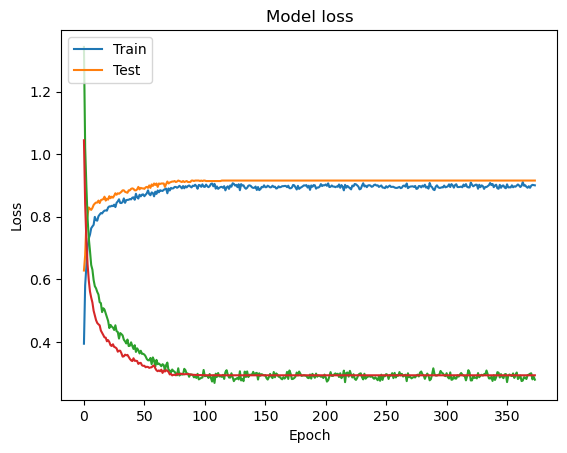

In [11]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y)), activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(X_train, y_train, 
                    epochs=450, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

best_model = load_model('best_model.h5')
y_pred = np.argmax(best_model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy_plot.png')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss_plot.png')